We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

# Checkpoint 1

Reminder:

- You are being evaluated for compeletion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
dftemp = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
dftemp.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [5]:
dftemp["ENROLL_ALL"].isna().sum()
(dftemp["ENROLL_ALL"]-dftemp["ENROLL_PREK"]-dftemp["ENROLL_KINDER"]-dftemp["ENROLL_PRIMARY"]-dftemp["ENROLL_HS"]).describe()
((dftemp["ENROLL_ALL"]-dftemp["ENROLL_PREK"]-dftemp["ENROLL_KINDER"]-dftemp["ENROLL_PRIMARY"]-dftemp["ENROLL_HS"])/dftemp["ENROLL_ALL"]*100).describe()



count    1012.000000
mean        0.523796
std         1.225569
min         0.000000
25%         0.000000
50%         0.000000
75%         0.297826
max         7.892933
dtype: float64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 4 Reading

How many years of data are logged in our dataset?

In [6]:
print(dftemp['YEAR'].max() - dftemp['YEAR'].min())

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [7]:
dftemp2 = dftemp.groupby('STATE')['AVG_READING_4_SCORE'].mean()
dfmich = dftemp2.loc['MICHIGAN']
dfoh = dftemp2.loc['OHIO']
print("Michigan: ", dfmich)
print("Ohio: ", dfoh)
print("Ohio has the higher average outcome score")

Michigan:  217.83333333333334
Ohio:  223.1818181818182
Ohio has the higher average outcome score


Find the average for your outcome score across all states in 2019

In [8]:
df2019 = dftemp[(dftemp['YEAR'] == 2019)]
df2019['AVG_READING_4_SCORE'].mean()

219.79245283018867

Find the maximum outcome score for every state.

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [9]:
dftemp.groupby('STATE')['AVG_READING_4_SCORE'].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:
dftemp['instr'] = dftemp['INSTRUCTION_EXPENDITURE']/dftemp['TOTAL_EXPENDITURE']
dftemp['cap'] = dftemp['CAPITAL_OUTLAY_EXPENDITURE']/dftemp['TOTAL_EXPENDITURE']

Feature engineering justification: I decided to see the ratio of total expenditure that goes into paying teachers/instructors and the capital outlay, i.e. the facilites and infrastructure available to the students. The first variable will tell us how well the teachers are being paid, since a better pay would lead to better quality of teaching from their part, as well as a higher probability of being better role models and iecouraging their students to take up reading/participate in the NAEP reading exam. The second variable will tell us about how much investment is going into giving students the facilities and opportunities they need to take the NAEP exams. For example, better libraries and testing conditions for the exam would all factor into the score of the students.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 0, 'Ratio of expenditure on instructors')

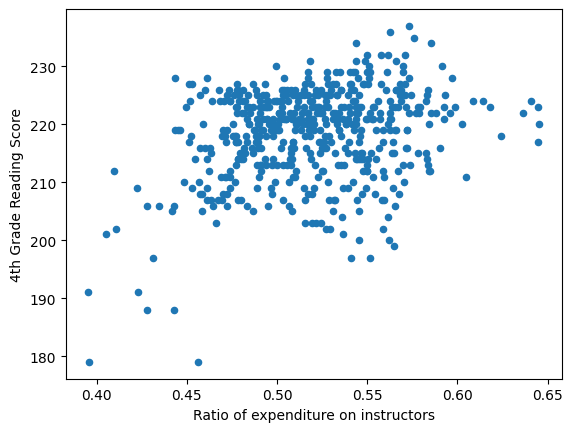

In [11]:
dftemp.plot.scatter(x="instr", y='AVG_READING_4_SCORE')
plt.ylabel('4th Grade Reading Score')
plt.xlabel('Ratio of expenditure on instructors')

We can see a linear relationship between the two variables, although it is not very strong.

**Visualization 2**

Text(0.5, 0, 'Ratio of expenditure on capital')

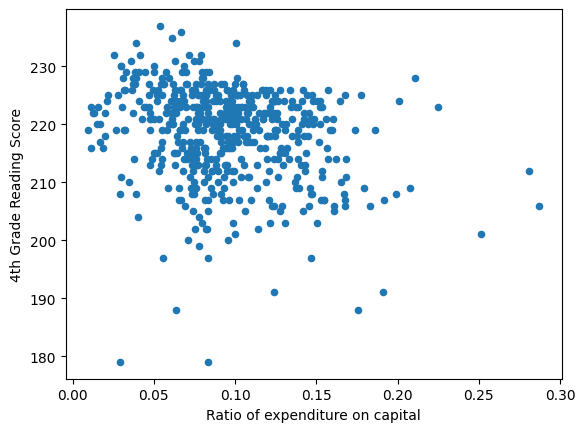

In [12]:
dftemp.plot.scatter(x="cap", y='AVG_READING_4_SCORE')
plt.ylabel('4th Grade Reading Score')
plt.xlabel('Ratio of expenditure on capital')

The two variables seem to have a linear, negative correlational relationship. This might be due to the fact that most of the expenditure on capital may not go towards improving the reading skills of the students, but on other factors such as sports equipment, classroom equipment, etc.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = dftemp[['instr', 'cap']].dropna()
y = dftemp.loc[X.index]['AVG_READING_4_SCORE']

In [15]:
y.fillna(y.mean(), inplace=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [21]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.0036810683493023744
-0.2800483487442615
2.6193620525812955
4.145739668845546


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

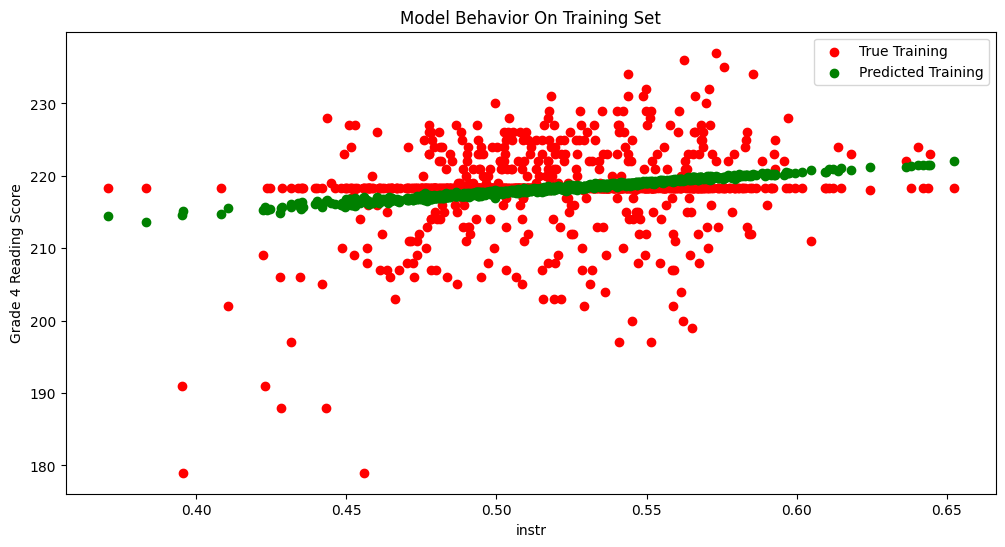

In [22]:
col_name = 'instr'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

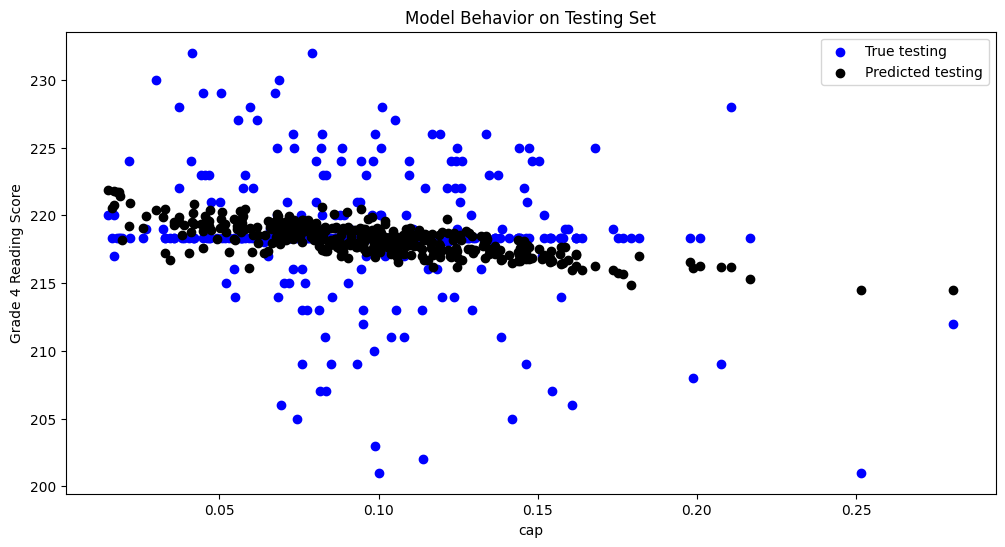

In [23]:
col_name = 'cap'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

The model shows a positive relationship between Grade 4 reading score and the ratio of total expenditure on instructors. It also shows a negative relationship between Grade 4 reading score and the ratio of total expenditure used on capital. My model doesn't seem to work well on the training set, which can be seen by the evaluation statistics calculated above. This could be due to poor choice of variables or the quality of the data.